# Statistical Simulations in Civil Engineering

Statistical simulations are a crucial tool in civil engineering, providing a means to model and analyze the variability and uncertainty inherent in many engineering problems. By leveraging statistical methods, engineers can better predict the performance and reliability of their designs under different scenarios.

### Why Statistical Simulations?

- **Uncertainty Analysis**: Helps in understanding the impact of variability in material properties, loadings, and environmental conditions.
- **Risk Assessment**: Allows for the evaluation of risks associated with different design choices and operational strategies.
- **Decision Making**: Aids in making informed decisions by providing probabilistic outcomes rather than deterministic ones.
- **Optimization**: Facilitates the optimization of designs and processes under uncertain conditions.

### Common Techniques in Statistical Simulations

1. **Monte Carlo Simulation**
   - **Concept**: Uses random sampling to obtain numerical results. It relies on repeated random sampling to simulate the probability of different outcomes.
   - **Application**: Used for risk assessment, reliability analysis, and project management.
   - **Example**: Simulating the variability in material properties to assess the probability of failure in a structure.

2. **Bootstrap Method**
   - **Concept**: A resampling technique used to estimate statistics on a population by sampling a dataset with replacement.
   - **Application**: Used to estimate the distribution of a statistic (e.g., mean, variance) and to construct confidence intervals.
   - **Example**: Estimating the variability of soil properties from a limited set of samples.

3. **Markov Chain Monte Carlo (MCMC)**
   - **Concept**: A method for sampling from a probability distribution based on constructing a Markov chain.
   - **Application**: Used in Bayesian analysis, reliability analysis, and stochastic modeling.
   - **Example**: Estimating the posterior distribution of model parameters in a Bayesian framework for structural health monitoring.



## Random Number Generation - Reminder!

Let's assume I know that the load on a suspended beam is 50kips on average, but, there is some uncertainty so, we can assume that it follows a normal distribution with a mean of 50kips and a standard deviation of 10 kips.  We can generate random numbers from this distribution using the following code:

Question to class:
What is the probability that a load will exceed 70kips?
You can use the z-table and find that

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'mean is 57.38 and standard deviation is 9.67')

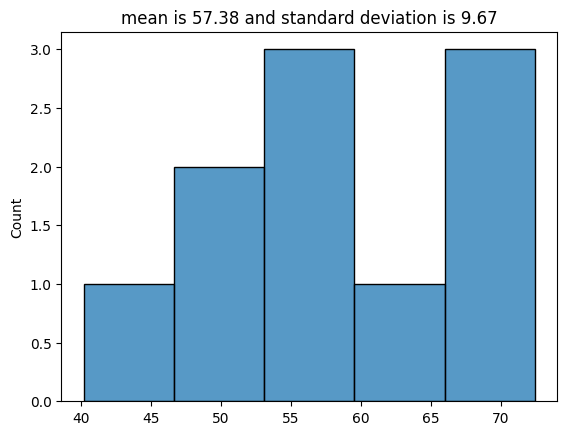

In [ ]:
np.random.seed(0)
numbers = np.random.normal(50,10,10) #generate 10 numbers from a normal distribution with mean 0 and standard deviation 1
sns.histplot(numbers)
plt.title(f'mean is {numbers.mean():.2f} and standard deviation is {numbers.std():.2f}') #this is kind of close, but I can probaby do better

Text(0.5, 1.0, 'mean is 50.18 and standard deviation is 10.33')

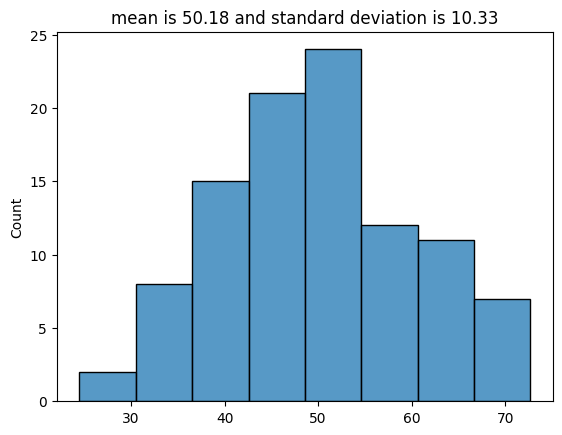

In [ ]:
numbers = np.random.normal(50,10,100) #generate 100 numbers from a normal distribution with mean 0 and standard deviation 1
sns.histplot(numbers)
plt.title(f'mean is {numbers.mean():.2f} and standard deviation is {numbers.std():.2f}') #this is much better!

Text(0.5, 1.0, 'mean is 49.90 and standard deviation is 9.90')

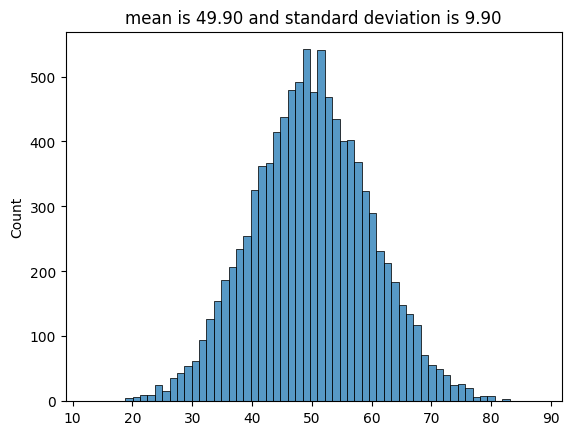

In [ ]:
numbers = np.random.normal(50,10,10000) #generate 1000 numbers from a normal distribution with mean 0 and standard deviation 1
sns.histplot(numbers)
plt.title(f'mean is {numbers.mean():.2f} and standard deviation is {numbers.std():.2f}') #we are getting closer!

Generally, the standard error decreases with the $\sqrt(N)$ where N is the number of samples. So, I need more and more samples to be more and more accurate. But that is okay, as for now, I have a computer!

## Why are simulations useful?

Simulations are useful because I can approximate statistical events by just similating a lot of examples of it.

**Example**

What is the probability that a load will exceed 70kips?
You can use the z-table and find that. We can calculate

$$
z=\frac{70-50}{10}=2
$$

You can go to the z-table and find that

$$
P(L\geq70) \approx 2.2%
$$

Okay, let's test it

In [ ]:
numbers = np.random.normal(50,10,10000)
P=sum(numbers>70)/len(numbers)
print(P*100) #Pretty close! All we had to do was to sample!

2.32


##More complex problems?
Okay, but so what? I could have used the z-table?

Yes, but what if we had a more complex system like the following.

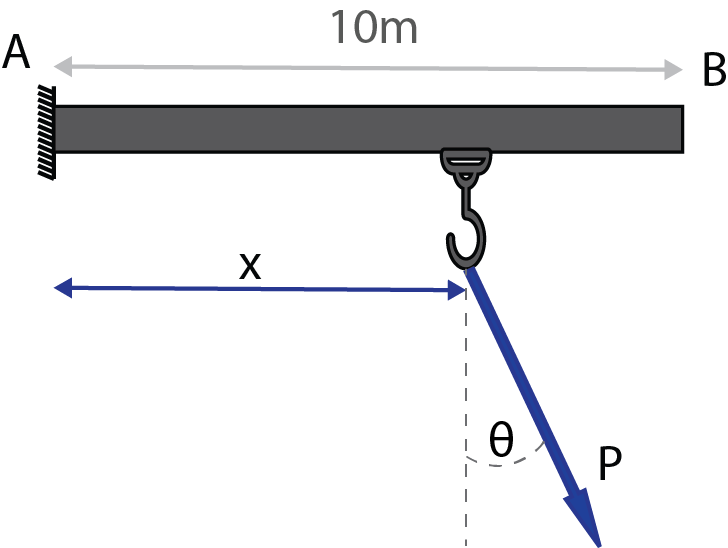

How would you calculate the Moment at point A?

$$
M_A=P \times x \times cos(\theta)
$$

Let's assume that P follows a normal distribution with mean 50 and std of 10 (kN)

Let's assume $\theta$ follows a normal distribution with mean 0 and std of $\pi/8$ (radians)

Let's assume that $x$ is fixed at 10m

**Question**

What is the Mean M? What is the probability that M exceeds 600kNm? How would I even approach this question?

Maybe the mean is $50*10*cos(0)=500?$

**Simulations**

Good news is, even when the problem is complex, I can always simulate it to get an approximation!

In [ ]:
N=1000
P=np.random.normal(50,10,N)
theta=np.random.normal(0,np.pi/8,N)
x=10

M=P*10*np.cos(theta)

In [ ]:
np.mean(M) #It is not!

465.0763708283638

In [ ]:
P=sum(M>600)/len(M) #probability of failure!
print(P*100)

11.200000000000001


(array([ 10.,  23.,  74., 216., 254., 216., 137.,  50.,  16.,   4.]),
 array([129.04789078, 199.7526332 , 270.45737562, 341.16211804,
        411.86686046, 482.57160288, 553.2763453 , 623.98108773,
        694.68583015, 765.39057257, 836.09531499]),
 <BarContainer object of 10 artists>)

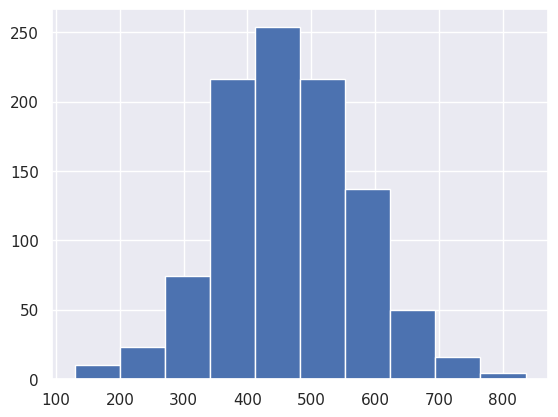

In [ ]:
sns.set()
plt.hist(M)

## Example - Pavement Damage

Assume that a pavement structure fails at a specific strain rate $\epsilon$ after number of repetitions of $N$. Example given in picture below

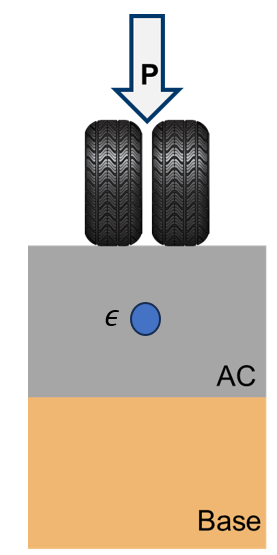

The number of repetitions to failure is given by

$$
N_{fail}=\epsilon^{2} \times N^{0.2}
$$

$\epsilon$ follows a normal distribition with mean 50 and std of 10 (microstrain)

$N$ follows a uniform distribution between 1000 and 5000 repetitions `np.random.uniform(low,high,N)` can be used to generate

**Question**

1. Plot a histogram of $N_{fail}$
2. Find the mean, standard deviation and probability that it is smaller than 10,000 repetitions

In [ ]:
n=10000
eps=np.random.normal(70,20,n)
N=np.random.uniform(1000,5000,n)

N_fail=eps**2*N**0.2

(array([1141., 2977., 2807., 1708.,  878.,  333.,  116.,   28.,    6.,
           6.]),
 array([1.03816800e+01, 1.05102099e+04, 2.10100381e+04, 3.15098663e+04,
        4.20096945e+04, 5.25095227e+04, 6.30093509e+04, 7.35091791e+04,
        8.40090073e+04, 9.45088355e+04, 1.05008664e+05]),
 <BarContainer object of 10 artists>)

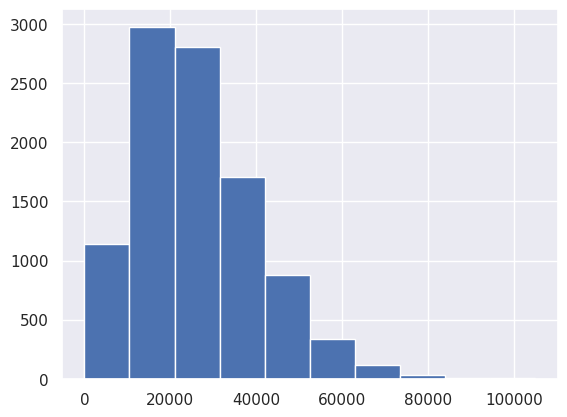

In [ ]:
plt.hist(N_fail)

In [ ]:
print(np.mean(N_fail))
print(np.std(N_fail))

26083.005438047807
14155.263484841735


In [ ]:
P=sum(N_fail<10000)/len(N_fail) #probability of failure!
print(P*100)

10.4
